## IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import io
import os

# IMPORT DATA

In [2]:
df = pd.read_csv('C:/Users/ASUS/OneDrive/Documents/Data Analyst Course/Portofolio/AB_NYC_2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# DATA UNDERSTANDING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Data consist of 16 columns dan 48895 rows. But from *Non-Null Count* can be seen that there is missing values.

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### the average *price* is 152.72 USD while the average of *minimum_nights* is 7.03 night

In [5]:
#how many room_type is there
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [6]:
#how many neighbourhood group is on there
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [7]:
#hom many neighbourhood is there
len(df.neighbourhood.unique())

221

#### there are 221 neighbourhood in 5 neighbourhood group, and 3 room type

# DATA PREPARATION

In [8]:
#drop unnecessary information
droplist = ["id", "host_name", "last_review"]
df.drop(droplist, axis="columns", inplace=True)
df.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### beberapa informasi dianggap kurang bermanfaat untuk analisis ini sehingga dikeluarkan. informasi yang dikeluarkan tersebut adalah variabel *id*, *host_name*, dan *last_review*.

In [9]:
#melihat banyaknya missing value per variabel
df.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#menangani missing value pada variabel 'reviews_per_month' to 0
df.fillna({'reviews_per_month':0}, inplace=True)
df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [11]:
#deleting duplicates data and converting last_review to datetime
df.drop_duplicates(inplace=True)

In [12]:
df.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## DATA EXPLORATION AND VISUALIZATION

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [14]:
#plotting the host_id vs number_of_listing
top_host = df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

<AxesSubplot:title={'center':'Host with most number of listing'}>

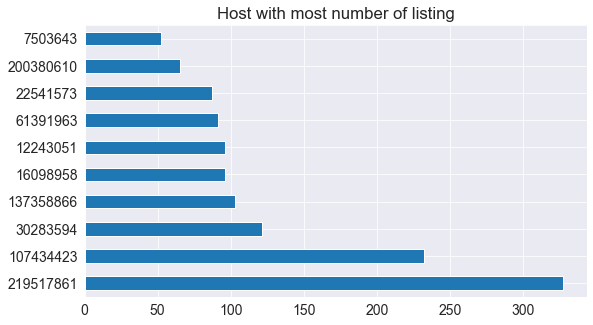

In [15]:
df.host_id.value_counts().head(10).plot(kind='barh', title='Host with most number of listing')

#### 219517861 is the id of the host with most number of listing

In [16]:
#top 10 neighbourhood
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<AxesSubplot:title={'center':'Top 10 Neighbourhood'}>

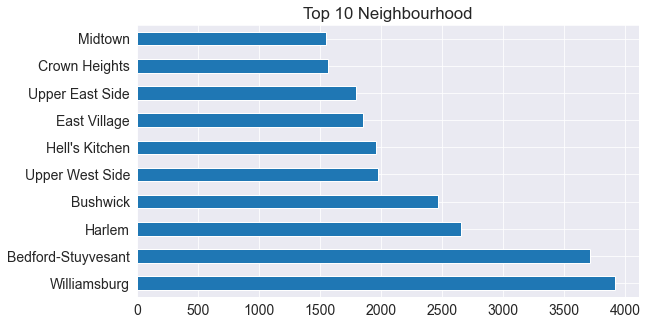

In [17]:
df.neighbourhood.value_counts().head(10).plot(kind='barh', title='Top 10 Neighbourhood')

<AxesSubplot:xlabel='price'>

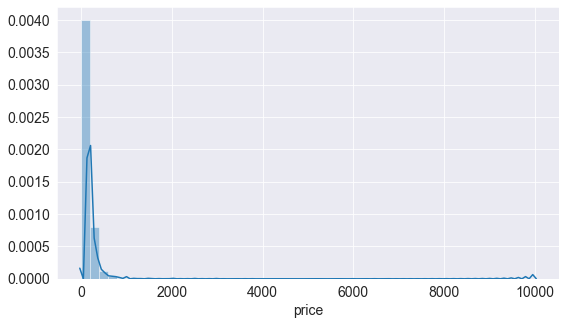

In [18]:
sns.distplot(df['price'])

#### looks like there is so muchhhhh outlier. for further analysis, we use price < 1000 to describe price distribution

<AxesSubplot:xlabel='price'>

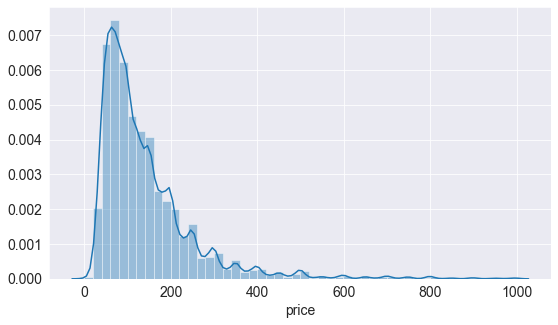

In [19]:
df = df[df.price < 1000]
sns.distplot(df['price'])

In [20]:
df.price.mean()

140.23729859867893

#### from the graph above can be seen that most of the price is between 0 USD to 600 USD with the average is 140 USD

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

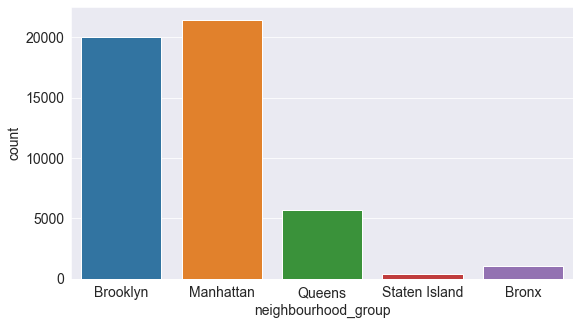

In [21]:
#AIRBNB distribution neighbourhood group wise
sns.countplot(x="neighbourhood_group",data=df)

#### from graph above we can infer that *Manhattan* is the neighourhood_group with most of AIRBNB listed in the whole NYC

<AxesSubplot:xlabel='room_type', ylabel='count'>

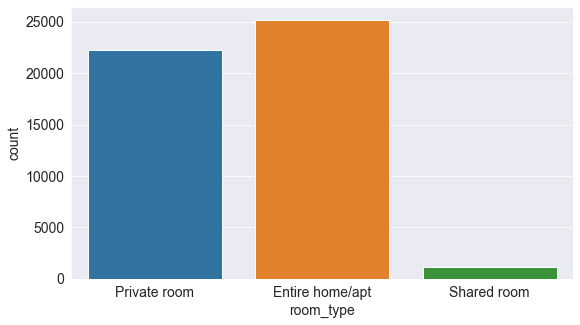

In [22]:
#AIRBNB distribution room_type wise
sns.countplot(x="room_type",data=df)

#### from graph above we can infer that *Entire home/apt* is the most room_type listed on the AIRBNB whole NYC

In [23]:
#average price base on the room type on all neighbourhood
pd.DataFrame(df.groupby(['neighbourhood_group','room_type']).mean()['price'])

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  125.198413
                    Private room      63.050691
                    Shared room       59.800000
Brooklyn            Entire home/apt  167.628746
                    Private room      72.566400
                    Shared room       50.527845
Manhattan           Entire home/apt  222.463891
                    Private room     108.998240
                    Shared room       87.075157
Queens              Entire home/apt  141.172414
                    Private room      68.244214
                    Shared room       49.312821
Staten Island       Entire home/apt  134.953757
                    Private room      62.292553
                    Shared room       57.444444

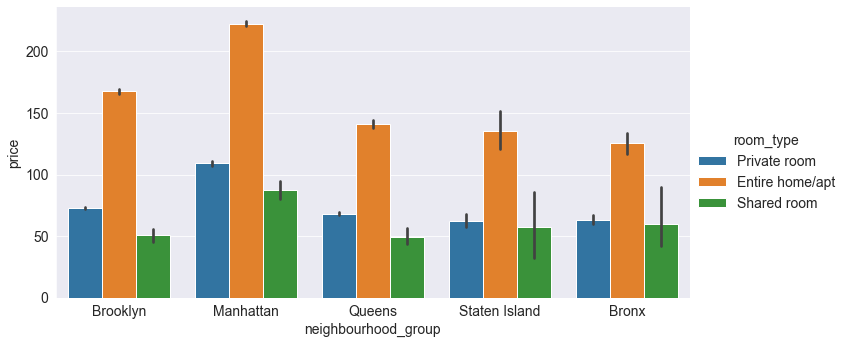

In [24]:
#where is the most expensive area?
sns.catplot(x='neighbourhood_group',y='price',data=df,kind='bar',hue='room_type', height=5, aspect=10/5)

#### from the dataframe and the graph above, we can infer that *Manhattan* is the *neighbourhood_group* with the most expensive room on AIRBNB

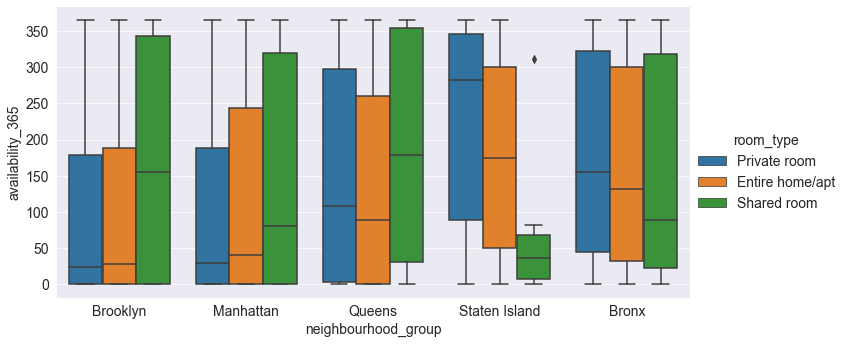

In [25]:
#Availability according to different room_type in different areas
sns.catplot(x='neighbourhood_group',y='availability_365',kind='box',hue='room_type',data=df,
            height=5, aspect=10/5)

#### *Shared room* tend to be the most highly available *room_type*, except on Staten Island.

<AxesSubplot:ylabel='room_type'>

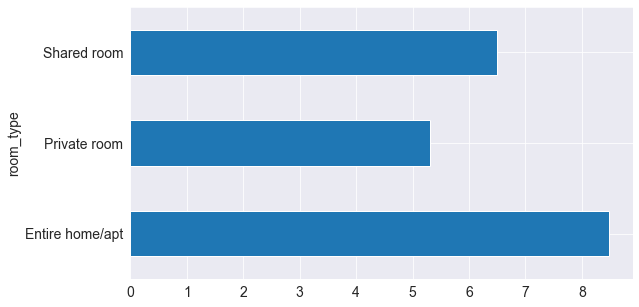

In [26]:
#hom many nights people stayed in each room type
df.groupby('room_type')['minimum_nights'].mean().plot(kind='barh')

#### customer choosing *Entire home/apt* than *Private room* and *Shared room* if want to stay longer

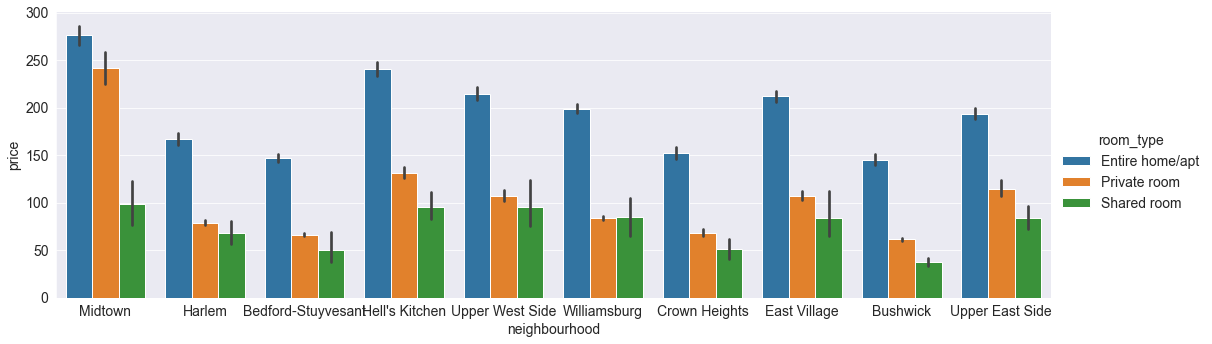

In [27]:
top10_nhood = df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                                               'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side',
                                               'Crown Heights','Midtown'])]
sns.catplot(x='neighbourhood',y='price',data=top10_nhood,kind='bar',hue='room_type', height=5, aspect=15/5)

#### from the graph we know that although midtown only occupies the tenth place of the top neighborhood list, but the price in midtown is the highest.

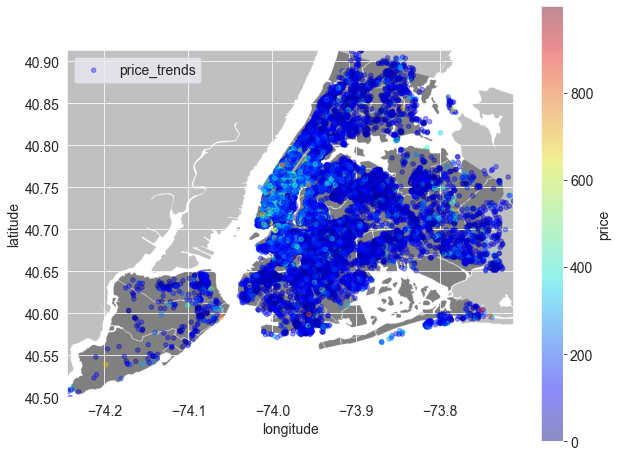

In [28]:
plt.figure(figsize=(10,7))
img=plt.imread('C:/Users/ASUS/OneDrive/Documents/Data Analyst Course/Portofolio/NYC_Map.png')

plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

In [29]:
#top 10 review
top_10rev=df.nlargest(10,'number_of_reviews')
top_10rev

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [30]:
price_avg_top_10rev = top_10rev.price.mean()
print('Average Price per Night : {}'.format(price_avg_top_10rev))

Average Price per Night : 65.4


#### *Room near JFK Queen bed* is the most reviewed, and from the top 10 most reviewed, the average price is 65.4 USD

<AxesSubplot:>

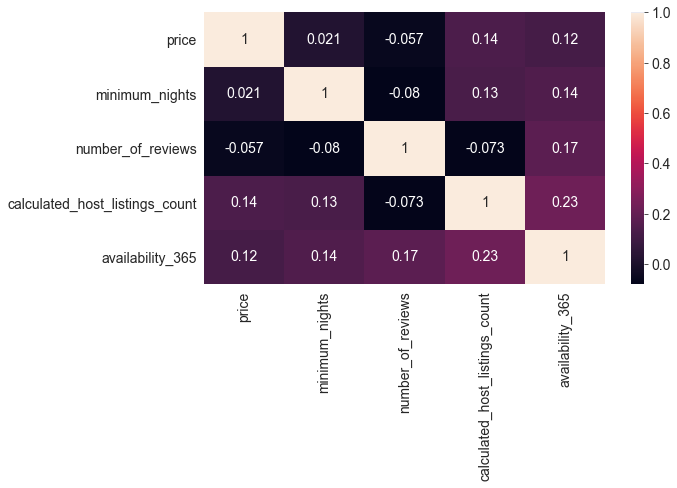

In [31]:
#Checking the correlation between numerical variable
df_cor = df.drop(['name','host_id','neighbourhood_group','neighbourhood','reviews_per_month','latitude','longitude','room_type'], axis="columns")
sns.heatmap(df_cor.corr(),annot = True)

#### From the graph it can be seen that one numeric variable is not correlated with another.

## MODELLING

### For this case, I use three machine learning algorithm to make the predictive model. The three model used is Linear Regression, Gradient Boosting Regression, and Random Forest Regressor. Library used is *sklearn* and with the three algorithm used, I will compare the algorithm base on its R-square and Error to choose the best one. variables used to modelling are *neighbourhood_group, room_type, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365*

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48597 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48581 non-null  object 
 1   host_id                         48597 non-null  int64  
 2   neighbourhood_group             48597 non-null  object 
 3   neighbourhood                   48597 non-null  object 
 4   latitude                        48597 non-null  float64
 5   longitude                       48597 non-null  float64
 6   room_type                       48597 non-null  object 
 7   price                           48597 non-null  int64  
 8   minimum_nights                  48597 non-null  int64  
 9   number_of_reviews               48597 non-null  int64  
 10  reviews_per_month               48597 non-null  float64
 11  calculated_host_listings_count  48597 non-null  int64  
 12  availability_365                

In [33]:
df.drop(['name','host_id','neighbourhood','latitude','longitude','reviews_per_month'], axis='columns', inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48597 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48597 non-null  object
 1   room_type                       48597 non-null  object
 2   price                           48597 non-null  int64 
 3   minimum_nights                  48597 non-null  int64 
 4   number_of_reviews               48597 non-null  int64 
 5   calculated_host_listings_count  48597 non-null  int64 
 6   availability_365                48597 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 4.0+ MB


### 1. Linear Regression Modelling

In [35]:
#encoding categorical data
df = pd.get_dummies(df, columns=["neighbourhood_group","room_type"])

In [36]:
#split the dataset
X = df.drop('price', axis='columns').values
y = df['price']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48597 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   price                              48597 non-null  int64
 1   minimum_nights                     48597 non-null  int64
 2   number_of_reviews                  48597 non-null  int64
 3   calculated_host_listings_count     48597 non-null  int64
 4   availability_365                   48597 non-null  int64
 5   neighbourhood_group_Bronx          48597 non-null  uint8
 6   neighbourhood_group_Brooklyn       48597 non-null  uint8
 7   neighbourhood_group_Manhattan      48597 non-null  uint8
 8   neighbourhood_group_Queens         48597 non-null  uint8
 9   neighbourhood_group_Staten Island  48597 non-null  uint8
 10  room_type_Entire home/apt          48597 non-null  uint8
 11  room_type_Private room             48597 non-null  uint8
 12  room_type_Shared r

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([ 61.16937924, 162.54187814,  62.0236441 , ...,  62.06638876,
       128.5566646 , 108.15645835])

In [41]:
# Compare predicted and actual values
Compare = pd.DataFrame({'Actual': y_test, 
                   'Predicted': y_pred,
                  'Abs. Error': abs(y_pred-y_test)})
Compare.head(10)

,Actual,Predicted,Abs. Error
28173,60,61.169379,1.169379
12358,100,162.541878,62.541878
46892,28,62.023644,34.023644
41177,55,109.651005,54.651005
48240,220,164.025854,55.974146
4,80,204.344449,124.344449
44460,48,107.285373,59.285373
6594,107,159.005400,52.005400
3424,89,42.683773,46.316227
46934,189,217.627438,28.627438


In [42]:
from sklearn.metrics import r2_score
LinearRegression_MAE = np.mean(np.absolute(y_pred - y_test))
LinearRegression_MSE = np.mean((y_pred -y_test)**2)
LinearRegression_R2 = r2_score(y_test, y_pred)
print("Mean absolute error: %.2f" % LinearRegression_MAE)
print("Mean Squared Error (MSE): %.2f" % LinearRegression_MSE)
print("R2-score: %.2f" % LinearRegression_R2 )

Mean absolute error: 54.98
Mean Squared Error (MSE): 8036.62
R2-score: 0.32


### 2. Gradient Boosting Regression

In [43]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance


In [44]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [45]:
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [46]:
y_pred1 = gbr.predict(X_test)

In [47]:
gbr_mse = mean_squared_error(y_test, gbr.predict(X_test))
print("Mean Squared Error (MSE): {:.4f}".format(gbr_mse))
print("R-2 Score: %.3f" % gbr.score(X_test, y_test))

Mean Squared Error (MSE): 7311.0680
R-2 Score: 0.377


In [48]:
print("R-2 Score: %.3f" % gbr.score(X_test, y_test))

R-2 Score: 0.377


In [49]:
# Compare predicted and actual values
Compare = pd.DataFrame({'Actual': y_test, 
                   'Predicted': y_pred1,
                  'Abs. Error': abs(y_pred1-y_test)})
Compare.head(10)

,Actual,Predicted,Abs. Error
28173,60,59.955524,0.044476
12358,100,153.647278,53.647278
46892,28,68.822105,40.822105
41177,55,98.729941,43.729941
48240,220,169.588215,50.411785
4,80,166.290891,86.290891
44460,48,95.022605,47.022605
6594,107,146.533627,39.533627
3424,89,65.649103,23.350897
46934,189,246.229482,57.229482


In [50]:
gbr.feature_importances_

array([6.91428988e-02, 4.63929390e-02, 6.05891596e-02, 9.03519187e-02,
       2.27995463e-04, 9.79020142e-03, 1.28646475e-01, 2.73792721e-04,
       5.48926302e-06, 5.92642655e-01, 1.06014290e-03, 8.76332248e-04])

#### Based on MSE and R-squared, Gradient Boosting Regression is a better choice than Linear Regression as the MSE(Gradient Boosting) is smaller than MSE(Linear Regression) and R^2(Gradient Boosting) is bigger than R^2(Linear Regression). Next we try use Random Forest Regression.

### 3. Random Forest Regression

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfr = RandomForestRegressor(max_depth=2, random_state=42)
rfr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=42)

In [53]:
predictions = rfr.predict(X_test)

In [54]:
# Compare predicted and actual values
Compare = pd.DataFrame({'Actual': y_test, 
                   'Predicted': predictions,
                  'Abs. Error': abs(y_pred-y_test)})
Compare.head(10)

,Actual,Predicted,Abs. Error
28173,60,70.093679,1.169379
12358,100,161.285606,62.541878
46892,28,70.093679,34.023644
41177,55,108.020289,54.651005
48240,220,161.285606,55.974146
4,80,222.509984,124.344449
44460,48,108.020289,59.285373
6594,107,161.285606,52.005400
3424,89,70.093679,46.316227
46934,189,222.509984,28.627438


In [55]:
#Evaluation Criteria
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rfr_mae = mean_absolute_error(y_test, predictions)
rfr_mse = mean_squared_error(y_test, predictions)
rfr_r2 = r2_score(y_test, predictions)
print('Mean Absolute Error: ', round(rfr_mae, 2))
print('Mean Squared Error: ', round(rfr_mse, 2))
print('R-2 Squared: ', round(rfr_r2, 2))

Mean Absolute Error:  55.07
Mean Squared Error:  8330.14
R-2 Squared:  0.29


In [56]:
rfr.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17802363, 0.        , 0.        , 0.82197637,
       0.        , 0.        ])

#### Based on MSE and R-squared, Gradient Boosting Regression is still the best choice with the lowest value of MSE and the highest value of R^2. And based on Random Forest and Gradient Boosting, we can see that two variables that have highest feature importance is X10 (room_type_Entire home/Apt) and X7 (neighbourhood_group_Manhattan) 

In [57]:
from tabulate import tabulate

In [58]:
d = {'MSE':[LinearRegression_MSE, rfr_mse, gbr_mse],
     'R^2':[LinearRegression_R2, rfr_r2, gbr.score(X_test, y_test)]}
Report = pd.DataFrame(data=d, index = ['Linear Regression','Random Forest Regression','Gradient Boost Regression'])
print(tabulate(Report, headers = 'keys', tablefmt = 'psql'))

+---------------------------+---------+----------+
|                           |     MSE |      R^2 |
|---------------------------+---------+----------|
| Linear Regression         | 8036.62 | 0.31527  |
| Random Forest Regression  | 8330.14 | 0.290261 |
| Gradient Boost Regression | 7311.07 | 0.377087 |
+---------------------------+---------+----------+
